In [3]:
import os

import numpy as np
import pandas as pd
import json
import cv2
from sklearn.model_selection import train_test_split
import cv2

# tf imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import backend as K

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    print(e)

loading images with labels

In [5]:
f = open(".\data\measurements.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()


,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


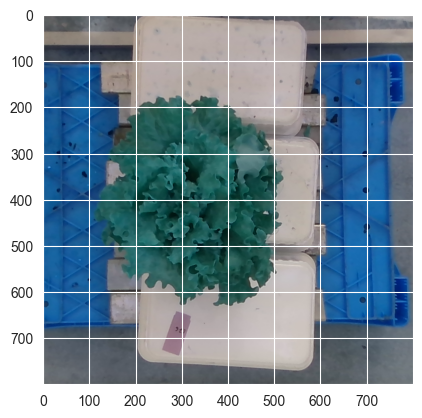

In [6]:
# testing images shaping
img = cv2.imread('.\data\RGBImages\RGB_270.png')
w, h, c = img.shape

img = img[ (w // 2 - 400 ) : (w // 2 + 400) , (h // 2 - 400 + 100)  : (h // 2 + 400 + 100) ]
plt.imshow(img)

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea


In [16]:

path = './data/RGBImagesResize/'
all_images = []
y = []
for image_path in os.listdir(path):
    try:
        y.append(df.loc[df['RGB_Image'] == image_path]['Height'].item())
        img = cv2.imread(path + image_path, -1)
        img = cv2.resize(img, (250, 250))
        all_images.append(img)
    except:
        print(df.loc[df['RGB_Image'] == image_path]['Height'].size)


X = np.array(all_images)

print(y)


8.2
5.1
7.1
6.5
7.0
6.5
6.6
8.7
8.6
7.3
8.1
8.2
5.6
7.8
10.3
8.4
7.5
7.0
9.2
6.0
6.8
7.0
7.5
7.1
7.1
6.2
7.5
7.9
8.0
8.4
8.8
7.0
7.8
8.5
10.1
8.4
8.7
11.6
10.8
9.3
10.6
9.8
12.9
10.1
8.9
5.6
11.6
12.0
11.2
10.6
11.5
13.3
10.4
13.7
11.3
11.0
5.1
11.3
9.0
11.3
12.5
12.1
11.3
13.1
12.8
11.0
13.2
9.6
12.2
10.3
12.5
9.8
13.4
13.5
13.9
11.3
13.1
13.5
5.0
11.0
12.4
9.5
12.4
12.0
14.5
12.3
12.1
15.0
11.2
6.2
12.0
11.3
9.2
11.8
10.6
10.0
10.3
9.8
11.9
12.1
5.4
10.8
9.5
11.3
9.0
9.4
12.0
11.0
12.0
11.0
13.0
8.5
8.5
12.0
13.0
14.0
11.0
12.0
13.0
13.0
10.0
9.0
8.0
7.9
12.0
12.0
8.0
14.0
9.0
10.5
10.0
11.0
11.0
15.0
5.4
14.0
17.0
16.0
15.0
12.0
14.0
16.0
16.5
16.0
11.0
8.5
11.0
10.0
11.0
11.0
11.0
11.0
11.0
10.0
13.0
13.0
7.8
11.0
16.0
17.5
13.0
16.4
17.0
15.0
13.5
15.0
14.8
6.5
15.5
13.5
12.9
11.1
14.0
15.8
16.5
12.1
15.5
13.5
5.5
15.0
22.0
17.5
20.5
20.1
20.5
22.0
20.0
23.0
20.1
9.0
22.5
21.5
23.1
16.5
14.0
14.0
16.0
18.3
16.5
8.0
16.0
15.2
15.0
14.5
14.5
17.0
18.0
17.0
15.0
17.0
6.0
16.0
13.0
17

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=[r2_keras])
model.summary()
# mean squared error
# mean absolute error percentage
# r2 score

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
plt.plot(history.history['loss'][4 : ])
plt.plot(history.history['val_loss'][4: ])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.predict([X_train[0]])

ResNet Implementation for regression: depth images height

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

!!LET OP NIET RUNNEN ZONDER GPU!!

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

In [ ]:
def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides=(1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

In [ ]:
def create_res_net(input_shape, regression):
    inputs = Input(shape=input_shape)
    num_filters = 64

    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j == 0 and i != 0), filters=num_filters)
        num_filters *= 2

    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(19, activation='softmax')(t)

    if regression:
        outputs = Dense(1, activation='linear')(t)

    model = Model(inputs, outputs)

    if regression:
        model.compile(
            optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_percentage_error']
        )
    else:
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

    return model

In [ ]:
rn = create_res_net((250,250,1),True)

In [ ]:
rn.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import datetime
import os

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'res_net_depth'+timestr

checkpoint_path = "checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)
tensorboard_callback = TensorBoard(
    log_dir=f'tensorboard_logs/{name}',
    histogram_freq=1
)
early_stop_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10
)

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

rn.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=16,
    callbacks=[cp_callback, tensorboard_callback, early_stop_callback]
)